<a href="https://colab.research.google.com/github/DFazekas/Colab1_Celsius_To_Fahrenheit/blob/master/Colab1_Celsius_To_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Basics: Training Your First Model
The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:

$$ f = c \times 1.8 + 32 $$

Although it would be easy enough to construct a conventional Python function to directly perform this calculation, that wouldn't be machine learning.

Instead, we will give TensorFlow training data: Celcius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100). It'll use these values to train a model for learning the above formula through the training process.

# Import dependencies
Before we can use TensorFlow, we need to import it. For simplicity, we'll rename it as "tf" and to only display errors.

Next, we'll also need NumPy imported as "np." Numpy helps to represent our data as highly performant lists.

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Set up training data
Supervised machine learning is all about providing the inputs and outputs to discover an algorithm. We'll create two lists `celcius_q` and `fahrenheit_a` that we can use to train our model.

In [5]:
celsius_q     = np.array([-40, -10, 0, 8, 15, 22, 38],  dtype=float)
fahrenheit_a  = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for c,f in zip(celsius_q, fahrenheit_a):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, f))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


# Create a model
Next, create a model. We'll create the simplest possible model -- a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

A **Dense** network is one where each neuron in a layer receives an input from all the neurons present in the previous layer -- thus, they're densely connected.

## Build a layer
We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:
- `input_shape=[1]` -- This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.
- `units=1` -- This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem. Since this is the final layer, it is also the size of the model's output -- a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer).

In [6]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

## Assemble layers into the model
Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, `l0`.

In [7]:
model = tf.keras.Sequential([l0])

## Compile the model, with loss and optimizer functions
Before training, the model has to be compiled. When compiled for training, the model is given:
- Loss Function -- A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss.")
- Optimizer Function -- A way of adjusting internal values in order to reduce the loss.

In [8]:
model.compile(
    loss="mean_squared_error", 
    optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (`model.fit()`, below) to first calculate the loss of each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the exact equation for converting Celcius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden away from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function (mean squared error) and the optimizer (Adam) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (`0.1` in the code above). This is the step size taken when adjustig values in the model. If the vlaue is too small, it will take too many iterations to train the model. Too large, and the accuracy goes down. Finding a good value often involves some trail and error, but the range is usually within 0.001 (default), and 0.1.

## Train the model
Train the model by calling the `fit` method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weight should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [10]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model.")

Finished training the model.


In later videos, we will go into more detail on what actually happens here and how a Dense layer actually works internally.

## Display training statistics
The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoche. A high loss means that the Fahrenheit degrees that the model predicts is far from the corresponding value in `fahrenheit_a`.

We'll use Matplotlib to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.

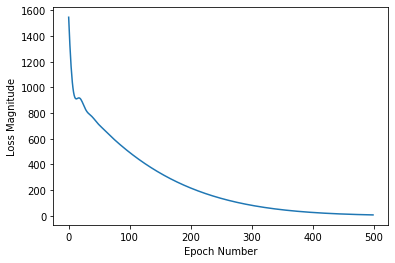

In [12]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

## Use the model to predict values
Now you have a model that has been trained to learn the relationship between `celsius_q` and `fahrenheit_a`. You can use the predict method to have it calculate the Fahrenheit degrees for a preivously unknown Celcius degrees.

So, for example, if the Celcius values is 100, what do you think the Fahrenheit result will be? Take a guess before you run this code.

In [13]:
print(model.predict([100.0]))

[[211.33656]]


The correst answer is $100 \times 1.8 + 32 = 212$, so our model is doing very well.

### To review


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epoches)

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celcius value. (Remember, 100 Celcius was not part of our training data.)



## Looking at the layer weights
Finally, let's print the internal variables of the Dense layer.

In [15]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.820751]], dtype=float32), array([29.26148], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and single output, the internal math looks the same as the equation for a line, $y=mx+b$, which has the same form as the conversion equation, $f=1.8c+32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

## A little experiment
Just for fun, what is we created more Dense layers with different units, which therefore has more variables?

In [16]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)

print("Finished training the model.")
print("Model predicts that 100 degrees Celcius is: {} degrees Fahrenheit.".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model.
Model predicts that 100 degrees Celcius is: [[211.74744]] degrees Fahrenheit.
These are the l0 variables: [array([[-0.614609  ,  0.7725018 , -0.29528964, -0.10910861]],
      dtype=float32), array([-3.8716495,  3.869182 ,  2.8800201, -0.6825069], dtype=float32)]
These are the l1 variables: [array([[ 1.1443269 , -0.06088413, -0.12940155,  0.5007154 ],
       [-1.131323  ,  0.22880004,  0.3934346 ,  0.10451993],
       [-0.9095193 ,  0.07786641,  0.7638636 , -0.21925527],
       [-0.48579472, -0.3541342 , -0.63362384, -0.26360345]],
      dtype=float32), array([-3.6962667 , -2.5341423 ,  3.5221539 ,  0.89295346], dtype=float32)]
These are the l2 variables: [array([[-1.2253575 ],
       [-0.12185814],
       [ 1.2234981 ],
       [-0.07126854]], dtype=float32), array([3.6283507], dtype=float32)]


As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the `l0` and `l1` layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.